In [1]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import join, dirname

In [2]:
root_dir = './'
behav_dir = root_dir + '/DMdata'

In [3]:
subj_dir = glob(join(behav_dir,'DM*'))
subj_dir.sort()
len(subj_dir)

31

# Task Type : 
### old = 0, new = 1
# Response 1 : 
### Old_Certain = 1, Old_Uncertain = 2, New_Uncertain = 3, New_Certain = 4
# Response 2 : 
### Location, new = 0, forgot = 5

In [4]:
ds = pd.DataFrame(columns=['Trial','ObjID','LocID','FB','Task','RT','Stim'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_study.txt'%subj, sep='\t', index_col=False)
    temp['Subj'] = subj
    ds = ds.append(temp)
# ds = ds.set_index(keys='Subj')
ds = ds[['ObjID','LocID','Subj']]
ds

,ObjID,LocID,Subj
0,245,4,DM01
1,183,2,DM01
2,54,1,DM01
3,220,3,DM01
4,65,2,DM01
...,...,...,...
259,179,1,DM31
260,153,4,DM31
261,54,2,DM31
262,53,3,DM31


<AxesSubplot:>

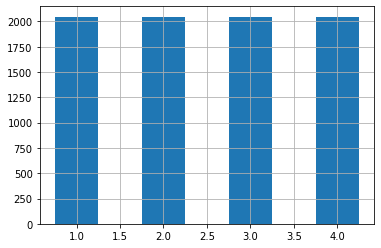

In [5]:
ini, fin = 1, 4
ds['LocID'].hist(bins=np.arange(ini-.25,fin+.75,.5))

In [6]:
dt = pd.DataFrame(columns=['Trial','Object_ID','Task_Type','Stim_onset1','RT1','Res1','Stim_onset2','RT2','Res2'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_test.txt'%subj, sep='\s+', header=0)
    temp['Subj'] = subj
    dt = dt.append(temp)
# dt = dt.set_index(keys='Subj')
dt = dt[['Trial','Object_ID','Task_Type','Res1','Res2','Subj']]
dt = dt.rename(columns={'Object_ID':'ObjID','Task_Type':'TT'})
dt

,Trial,ObjID,TT,Res1,Res2,Subj
0,1,72,1,2,0,DM01
1,2,122,1,4,0,DM01
2,3,114,1,3,0,DM01
3,4,108,0,1,3,DM01
4,5,145,0,1,3,DM01
...,...,...,...,...,...,...
523,524,54,0,4,5,DM31
524,525,253,0,1,2,DM31
525,526,108,1,4,0,DM31
526,527,38,0,1,4,DM31


In [7]:
# dt = dt[~dt['TT'].isin([1])]
df = pd.merge(ds,dt)
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,1,4
1,245,4,DM01,362,1,2,0
2,183,2,DM01,61,0,3,5
3,183,2,DM01,157,1,3,0
4,54,1,DM01,95,0,1,1
...,...,...,...,...,...,...,...
16361,54,2,DM31,524,0,4,5
16362,53,3,DM31,312,1,3,0
16363,53,3,DM31,419,0,4,5
16364,163,1,DM31,377,0,2,5


In [8]:
choice = ['HIT-HC','HIT-LC','MISS-LC','MISS-HC','FA-HC','FA-LC','CR-LC','CR-HC']
# df[df.TT==0].Res1 = df[df.TT==0].Res1.replace({1:choice[0],2:choice[1],3:choice[2],4:choice[3]})
df['Res1'] = [choice[tt*4 + res1 - 1] for tt, res1 in zip(df['TT'],df['Res1'])]
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,HIT-HC,4
1,245,4,DM01,362,1,FA-LC,0
2,183,2,DM01,61,0,MISS-LC,5
3,183,2,DM01,157,1,CR-LC,0
4,54,1,DM01,95,0,HIT-HC,1
...,...,...,...,...,...,...,...
16361,54,2,DM31,524,0,MISS-HC,5
16362,53,3,DM31,312,1,CR-LC,0
16363,53,3,DM31,419,0,MISS-HC,5
16364,163,1,DM31,377,0,HIT-LC,5


In [10]:
dMEAN = pd.DataFrame(columns=choice, index=[a[-4:] for a in subj_dir])
dSE = dMEAN

In [17]:
df[df['Subj'] == 'DM01'].Res1.isin(['HIT-HC'])

0       True
1      False
2      False
3      False
4       True
       ...  
523    False
524     True
525    False
526     True
527    False
Name: Res1, Length: 528, dtype: bool